In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

# data preprocessing

In [3]:
# Function to load and preprocess an image
def preprocess_image(image_path, target_size=(128, 128)):
    # Load image from path
    img = load_img(image_path, target_size=target_size)  # Resize image to target size
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

In [4]:
# Example: Load and preprocess a single image
image_path = 'D:/python/data/train/positive/00004.jpg'
preprocessed_image = preprocess_image(image_path)

In [5]:
# Visualize the original and preprocessed image
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

(-0.5, 226.5, 169.5, -0.5)

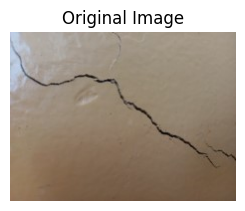

In [6]:
# Display original image
plt.subplot(1, 2, 1)
original_img = load_img(image_path)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

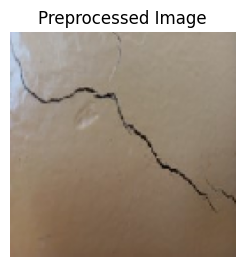

In [7]:
# Display preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image)
plt.title("Preprocessed Image")
plt.axis('off')

plt.show()

# data augmentation

In [8]:
# Initialize ImageDataGenerator with augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images by 0 to 20 degrees
    width_shift_range=0.2,    # Shift images horizontally by 0 to 20% of the width
    height_shift_range=0.2,   # Shift images vertically by 0 to 20% of the height
    shear_range=0.2,          # Apply random shear transformations
    zoom_range=0.2,           # Zoom images randomly by 0 to 20%
    horizontal_flip=True,     # Flip images horizontally with 50% probability
    fill_mode='nearest'       # Fill missing pixels after transformations using nearest pixel
)

In [9]:
# Example: Augment the preprocessed image
# Reshape image to include a batch dimension (required for augmentation)
image_batch = np.expand_dims(preprocessed_image, axis=0)

In [10]:
# Generate augmented images in batches
augmented_images = datagen.flow(image_batch, batch_size=1) #takes a batch of images and augment one image at time

In [11]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


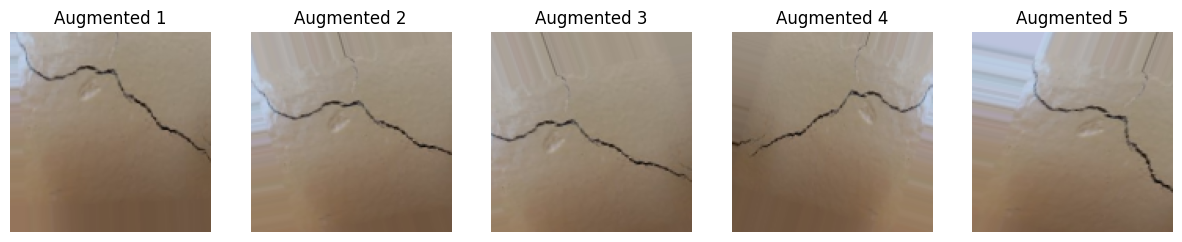

In [12]:
# Visualize augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(next(augmented_images)[0])
    ax.set_title(f"Augmented {i+1}")
    ax.axis('off')

plt.show()

# dataset splitting

In [13]:
data_dir = "D:/python/train/Positive"
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.jpg')]

In [14]:
print(f"Total images loaded: {len(file_paths)}")

Total images loaded: 15000


In [15]:
np.random.seed(42)  # For reproducibility
np.random.shuffle(file_paths)

In [16]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [17]:
total_size = len(file_paths)
train_size = int(total_size * train_ratio)
val_size = int(total_size * val_ratio)

In [18]:
train_files = file_paths[:train_size]
val_files = file_paths[train_size:train_size + val_size]
test_files = file_paths[train_size + val_size:]

In [19]:
print(f"Train set size: {len(train_files)}")
print(f"Validation set size: {len(val_files)}")
print(f"Test set size: {len(test_files)}")

Train set size: 10500
Validation set size: 2250
Test set size: 2250


In [20]:
#negative

In [21]:
data_dir = "D:/python/train/Negative"
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.jpg')]

In [22]:
print(f"Total images loaded: {len(file_paths)}")

Total images loaded: 15000


In [23]:
np.random.seed(42)  # For reproducibility
np.random.shuffle(file_paths)

In [24]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [25]:
total_size = len(file_paths)
train_size = int(total_size * train_ratio)
val_size = int(total_size * val_ratio)

In [26]:
train_files = file_paths[:train_size]
val_files = file_paths[train_size:train_size + val_size]
test_files = file_paths[train_size + val_size:]

In [27]:
print(f"Train set size: {len(train_files)}")
print(f"Validation set size: {len(val_files)}")
print(f"Test set size: {len(test_files)}")

Train set size: 10500
Validation set size: 2250
Test set size: 2250


# splitting in directories

In [ ]:
import shutil

In [ ]:
import random

# Function to split and copy files
def split_and_copy_files(original_data_dir, positive=True):
    # Create directories for the splits
    label = 'positive' if positive else 'negative'
    os.makedirs(f'data/train/{label}', exist_ok=True)
    os.makedirs(f'data/validation/{label}', exist_ok=True)
    os.makedirs(f'data/test/{label}', exist_ok=True)

    # Get all files from the original directory
    all_files = os.listdir(original_data_dir)
    
    # Shuffle the files randomly
    random.shuffle(all_files)

    # Calculate the number of files for each split
    train_split = int(0.7 * len(all_files))
    validation_split = int(0.2 * len(all_files))
    test_split = len(all_files) - train_split - validation_split

    # Split the files
    train_files = all_files[:train_split]
    validation_files = all_files[train_split:train_split + validation_split]
    test_files = all_files[train_split + validation_split:]

    # Copy files to the respective directories
    for f in train_files:
        shutil.copy(os.path.join(original_data_dir, f), f'data/train/{label}')

    for f in validation_files:
        shutil.copy(os.path.join(original_data_dir, f), f'data/validation/{label}')

    for f in test_files:
        shutil.copy(os.path.join(original_data_dir, f), f'data/test/{label}')

# Process positive images
split_and_copy_files("D:/python/train/Positive", positive=True)

# Process negative images
split_and_copy_files("D:/python/train/Negative", positive=False)

print("Data has been split into train, validation, and test sets for both positive and negative categories.")


# Integrating Preprocessing and Augmentation into a Data Pipeline:

In [28]:
# Directory containing your images
train_dir = 'D:/python/data/train'
val_dir = 'D:/python/data/validation'

In [29]:
# Create ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Randomly rotate images by 0 to 20 degrees
    width_shift_range=0.2,     # Shift images horizontally by 0 to 20% of the width
    height_shift_range=0.2,    # Shift images vertically by 0 to 20% of the height
    shear_range=0.2,           # Apply random shear transformations
    zoom_range=0.2,            # Zoom images randomly by 0 to 20%
    horizontal_flip=True,      # Flip images horizontally with 50% probability
    fill_mode='nearest'        # Fill missing pixels after transformations using nearest pixel
)

In [30]:
val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation data

In [31]:
# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(227, 170),    # Resize images
    batch_size=32,
    class_mode='binary',       # Use 'binary' for two classes (e.g., deformed vs. normal)
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(227, 170),
    batch_size=32,
    class_mode='binary',       # Adjust for multi-class if needed
    shuffle=False
)

Found 21000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


# Define cnn model

In [32]:
# Add convolutional and pooling layers
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(227,170,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'), 
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'), 
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Flatten the output before passing it to dense layers
# model.add(tf.keras.layers.Flatten())

In [34]:
# Add Dense layers
#model.add(tf.keras.layers.Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Example for 10 classes

In [35]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 225, 168, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 84, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 82, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 41, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 39, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 31616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,187,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,212,001 (61.84 MB)

 Trainable params: 16,212,001 (61.84 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
print(model.inputs[0].shape)


(None, 227, 170, 3)


In [38]:
print(model.output_shape)


(None, 1)


In [39]:
# Train the model using the generators
#train_generator = train_generator.repeat()
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 907s 1s/step - accuracy: 0.7498 - loss: 0.5365 - val_accuracy: 0.8869 - val_loss: 0.2575
Epoch 2/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - accuracy: 0.8438 - loss: 0.3446 - val_accuracy: 0.7500 - val_loss: 0.6417
Epoch 3/10


C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


656/656 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.8839 - loss: 0.2673 - val_accuracy: 0.9078 - val_loss: 0.1864
Epoch 4/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.8750 - loss: 0.2235 - val_accuracy: 0.8125 - val_loss: 0.6237
Epoch 5/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 622s 948ms/step - accuracy: 0.9357 - loss: 0.1568 - val_accuracy: 0.9535 - val_loss: 0.1243
Epoch 6/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.9062 - loss: 0.3984 - val_accuracy: 0.8750 - val_loss: 0.3591
Epoch 7/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 563s 858ms/step - accuracy: 0.9556 - loss: 0.1153 - val_accuracy: 0.9794 - val_loss: 0.0833
Epoch 8/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.9688 - loss: 0.0938 - val_accuracy: 0.9375 - val_loss: 0.2400
Epoch 9/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 580s 884ms/step - accuracy: 0.9644 - loss: 0.1007 - val_accuracy: 0.9813 - val_loss: 0.0596
Epoch 10/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 1.0000 - loss: 0.0161 - val_acc

# Evaluate model

In [40]:
test_dir = 'D:/python/data/test'

In [41]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

In [42]:
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(227, 170),    # Resize images
    batch_size=32,
    class_mode='binary',       # Use 'binary' for two classes (e.g., deformed vs. normal)
    shuffle=True
)

Found 3000 images belonging to 2 classes.


In [43]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator,  # Replace with your test data
                                          steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss* 100:.2f}%")
print(f"Test Accuracy: {test_accuracy* 100:.2f}%")


93/93 ━━━━━━━━━━━━━━━━━━━━ 43s 465ms/step - accuracy: 0.9742 - loss: 0.0726
Test Loss: 7.27%
Test Accuracy: 97.51%


In [51]:
# Evaluate on the validation data
val_loss, val_accuracy = model.evaluate(val_generator,  # Validation data generator
                                        steps=val_generator.samples // val_generator.batch_size)

print(f"Validation Loss: {val_loss* 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")


187/187 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.9923 - loss: 0.0465
Validation Loss: 6.32%
Validation Accuracy: 97.89%


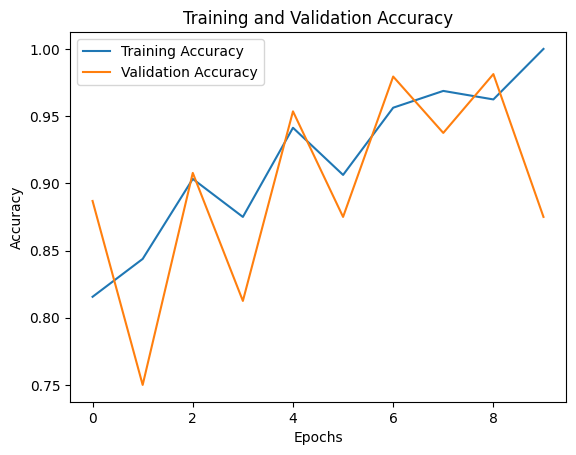

In [52]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## dont run 

In [46]:
!pip install scikit-learn

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
predicted_classes = model.predict(X_test)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Saving and loading the model

In [45]:
# Save the model
model.save('my_cnn_model.keras')

In [46]:
#load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('my_cnn_model.keras')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss* 100:.2f}%")
print(f"Test Accuracy: {test_accuracy* 100:.2f}%")


93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.9763 - loss: 0.0656
Test Loss: 7.13%
Test Accuracy: 97.61%


In [47]:
from keras.preprocessing import image

In [48]:
img=image.load_img('D:/python/data/test/negative/00289.jpg')

In [49]:
dir_path = "xyz"
for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(227, 170))

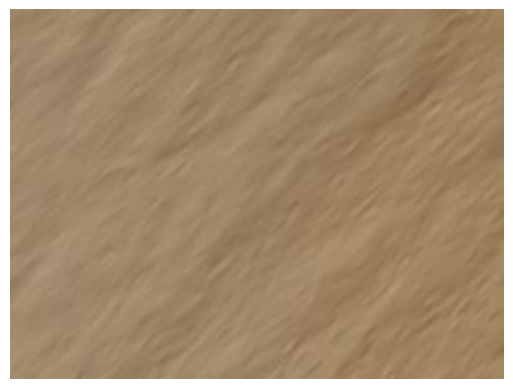

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
There is no crack


In [50]:
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()  # Show the image
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X = X / 255.0  # Normalize the image
# Assuming 'model' is your pre-trained model
val = model.predict(X)

# If the output is a probability, use an appropriate threshold
if val[0][0] > 0.5:  # Adjust threshold as needed
    print("It is a crack")
else:
    print("There is no crack")

# Vedio code

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the pre-trained CNN model
def load_crack_detection_model(model_path):
    return load_model('my_cnn_model.keras')

# Function to process a video and detect cracks in frames
def process_video(video_path, model_path, output_video_path=None):
    # Load the trained model
    model = load_crack_detection_model('my_cnn_model.keras')

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Frame dimensions
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Video writer for annotated output (if specified)
    out = None
    if output_video_path:
        out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    print("Processing video...")
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame for the model
        resized_frame = cv2.resize(frame, (128, 128))  # Adjust size to match model input
        processed_frame = img_to_array(resized_frame) / 255.0  # Normalize
        processed_frame = np.expand_dims(processed_frame, axis=0)

        # Predict if the frame contains a crack
        prediction = model.predict(processed_frame)
        label = "Crack Detected" if prediction[0][0] > 0.5 else "No Crack"

        # Annotate the frame
        color = (0, 0, 255) if label == "Crack Detected" else (0, 255, 0)
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(frame, (5, 5), (frame_width - 5, frame_height - 5), color, 2)

        # Write the annotated frame to the output video
        if out:
            out.write(frame)

        # Optionally, display the frame
        cv2.imshow('Video Frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
            break

    # Release resources
    cap.release()
    if out:
        out.release()
    cv2.destroyAllWindows()
    print("Processing complete. Output saved to:", output_video_path if output_video_path else "No output file specified.")

# Example Usage
# Update the paths accordingly before running
model_path = "path_to_your_model.keras"  # Replace with your model path
video_path = "input_video.mp4"          # Replace with your input video path
output_video_path = "output_video.avi"  # Replace with your desired output path (optional)

process_video(video_path, model_path, output_video_path)

# Depth 

In [58]:
import cv2

# Crack depth estimation (simplified example, usually requires more complex methods)
def estimate_crack_depth(contours):
    depths = []
    for contour in contours:
        area = cv2.contourArea(contour)
        depth = area ** 0.5  # Simplified depth estimation
        depths.append(depth)
    return depths

# Process frame
def process_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    depths = estimate_crack_depth(contours)

    # Draw contours and display depth on the image
    for i, contour in enumerate(contours):
        cv2.drawContours(frame, [contour], -1, (0, 255, 0), 2)  # Draw the contour
        if len(contour) > 0:  # Display depth near the contour
            x, y = contour[0][0]
            cv2.putText(frame, f"Depth: {depths[i]:.2f}", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, (255, 0, 0), 1, cv2.LINE_AA)

    return frame, depths



In [61]:
# Load a sample image or video frame
frame = cv2.imread("D:/validation/Positive/00174.jpg")  # Replace with your image file
if frame is not None:
    processed_frame, depths = process_frame(frame)

    # Display the image
    cv2.imshow("Processed Frame", processed_frame)
    print("Estimated depths:", depths)

    # Wait for key press and close
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image.")


Estimated depths: [7.44983221287567]


# backend

In [67]:
!pip install Flask tensorflow

In [68]:
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model
from io import BytesIO
import base64

In [69]:
# Initialize the Flask app
app = Flask(__name__)

In [70]:
# Load your pre-trained model (change the path to where your model is saved)
model = load_model('my_cnn_model.keras')

In [71]:
# Define image upload folder
UPLOAD_FOLDER = 'uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['ALLOWED_EXTENSIONS'] = {'png', 'jpg', 'jpeg'}

In [72]:
# Helper function to check file extensions
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in app.config['ALLOWED_EXTENSIONS']

In [73]:
# Helper function to prepare the image for prediction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(227, 170))  # resize to the model's expected input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

In [74]:
# Route for the main page
@app.route('/')
def index():
    return render_template('index.html')


In [75]:
# Route to handle the image upload and prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Check if a file is part of the request
    if 'file' not in request.files:
        return jsonify({"error": "No file part"}), 400
    
    file = request.files['file']
    
    if file.filename == '':
        return jsonify({"error": "No selected file"}), 400
    
    if file and allowed_file(file.filename):
        # Save the uploaded ima
        img_path = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
        file.save(img_path)

        # Prepare the image for prediction
        img_array = prepare_image(img_path)

        # Predict using the model
        prediction = model.predict(img_array)
        
        # Determine the result based on the prediction
        result = "Crack Detected" if prediction[0][0] > 0.5 else "No Crack Detected"
        accuracy = prediction[0][0] * 100

        # Create a plot for displaying the image and prediction result
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        # Left side: input image
        img = image.load_img(img_path)
        ax[0].imshow(img)
        ax[0].set_title("Input Image")
        ax[0].axis('off')

        # Right side: Output image with result text
        ax[1].imshow(img)
        ax[1].set_title(f"{result}\nAccuracy: {accuracy:.2f}%")
        ax[1].axis('off')

        # Convert the plot to PNG and then to base64 string
        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_str = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()

        return render_template('index.html', img_str=img_str, result=result, accuracy=accuracy)
    else:
        return jsonify({"error": "Invalid file format"}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
